In [1]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
from prophet import Prophet
import datetime as dt
import scipy.stats as sts
import hvplot.pandas

US crime rates 1960-2014

In [2]:
# Read the CSV file into a `pandas` DataFrame - US Crime Rates 1960-2014 Data Set
us_crime_1960_2014_df = pd.read_csv("resources/US_Crime_Rates_1960_2014.csv", low_memory=False)

# Update column names and set max columns
us_crime_1960_2014_df.columns = us_crime_1960_2014_df.columns.str.lower()
us_crime_1960_2014_df.columns = us_crime_1960_2014_df.columns.str.replace(' ', '_')
pd.set_option("display.max_columns", None)

# Display df head and info
display(us_crime_1960_2014_df.head())
display(us_crime_1960_2014_df.info())

us_crime_1960_2014_df.head()

,year,population,total,violent,property,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                55 non-null     int64
 1   population          55 non-null     int64
 2   total               55 non-null     int64
 3   violent             55 non-null     int64
 4   property            55 non-null     int64
 5   murder              55 non-null     int64
 6   forcible_rape       55 non-null     int64
 7   robbery             55 non-null     int64
 8   aggravated_assault  55 non-null     int64
 9   burglary            55 non-null     int64
 10  larceny_theft       55 non-null     int64
 11  vehicle_theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


None

In [3]:
us_crime_1960_2014_df.head()

,year,population,total,violent,property,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [5]:
us_crime_1960_2014_df.set_index('year', inplace=True)

In [6]:
us_crime_1960_2014_df.head()

,population,total,violent,property,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [7]:
us_crime_1960_2014_df.drop(columns=['population'], inplace=True)

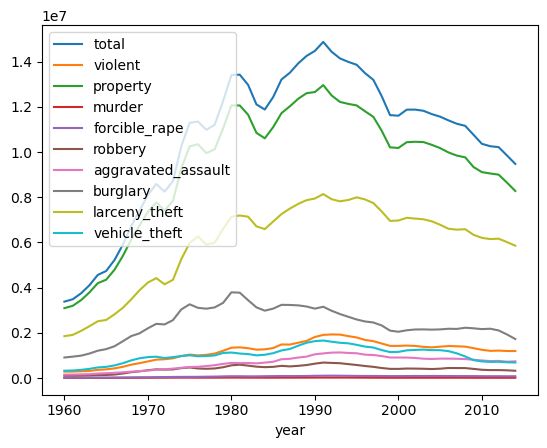

In [18]:
# us_crime_1960_2014_df.hvplot.line(title="US Crime Rates 1960-2014", xlabel="Year", ylabel="Crime Rate", rot=90, width=1000, height=500);
# us_crime_1960_2014_df.hvplot()
us_crime_1960_2014_df.plot();